This notebook evaluates first the impact of different designs of grid charges on the distribution grid. Afterwards the cost savings of each household are calculated and compared between the differnet grid charge designs.

### Requirements

Load the necessary packages.

In [25]:
import pandas as pd
from numpy import pi
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
#Define plotting settings
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 12

### Transformer

Find the time steps that exceed transformer capacity by loading data from the results repository and checking when transformer load exceed 100%.

In [3]:
#Read in transformer load in the case of volumetric grid charges
tl_base = pd.read_excel(r'.\results\results_0flex100flat\res_trafo\loading_percent.xlsx', index_col=0)
tol_base = (tl_base.iloc[:, 0] > 100).sum()
tl_flex25 = pd.read_excel(r'.\results\results_25flex75flat\res_trafo\loading_percent.xlsx', index_col=0)
tol_flex25 = (tl_flex25.iloc[:, 0] > 100).sum()
tl_flex50 = pd.read_excel(r'.\results\results_50flex50flat\res_trafo\loading_percent.xlsx', index_col=0)
tol_flex50 = (tl_flex50.iloc[:, 0] > 100).sum()
tl_flex75 = pd.read_excel(r'.\results\results_75flex25flat\res_trafo\loading_percent.xlsx', index_col=0)
tol_flex75 = (tl_flex75.iloc[:, 0] > 100).sum()
tl_flex100 = pd.read_excel(r'.\results\results_100flex0flat\res_trafo\loading_percent.xlsx', index_col=0)
tol_flex100 = (tl_flex100.iloc[:, 0] > 100).sum()

In [4]:
#Read in transformer load in the case of peak pricing
tl_peak0 = pd.read_excel(r'.\results\results_0flex100flat_peak\res_trafo\loading_percent.xlsx', index_col=0)
tol_peak0 = (tl_peak0.iloc[:, 0] > 100).sum()
tl_peak25 = pd.read_excel(r'.\results\results_25flex75flat_peak\res_trafo\loading_percent.xlsx', index_col=0)
tol_peak25 = (tl_peak25.iloc[:, 0] > 100).sum()
tl_peak50 = pd.read_excel(r'.\results\results_50flex50flat_peak\res_trafo\loading_percent.xlsx', index_col=0)
tol_peak50 = (tl_peak50.iloc[:, 0] > 100).sum()
tl_peak75 = pd.read_excel(r'.\results\results_75flex25flat_peak\res_trafo\loading_percent.xlsx', index_col=0)
tol_peak75 = (tl_peak75.iloc[:, 0] > 100).sum()
tl_peak100 = pd.read_excel(r'.\results\results_100flex0flat_peak\res_trafo\loading_percent.xlsx', index_col=0)
tol_peak100 = (tl_peak100.iloc[:, 0] > 100).sum()

In [5]:
#Read in transformer load in the case of 3-level segmented grid charges
tl_3Level0 = pd.read_excel(r'.\results\results_0flex100flat_3Level\res_trafo\loading_percent.xlsx', index_col=0)
tol_3Level0 = (tl_3Level0.iloc[:, 0] > 100).sum()
tl_3Level25 = pd.read_excel(r'.\results\results_25flex75flat_3Level\res_trafo\loading_percent.xlsx', index_col=0)
tol_3Level25 = (tl_3Level25.iloc[:, 0] > 100).sum()
tl_3Level50 = pd.read_excel(r'.\results\results_50flex50flat_3Level\res_trafo\loading_percent.xlsx', index_col=0)
tol_3Level50 = (tl_3Level50.iloc[:, 0] > 100).sum()
tl_3Level75 = pd.read_excel(r'.\results\results_75flex25flat_3Level\res_trafo\loading_percent.xlsx', index_col=0)
tol_3Level75 = (tl_3Level75.iloc[:, 0] > 100).sum()
tl_3Level100 = pd.read_excel(r'.\results\results_100flex0flat_3Level\res_trafo\loading_percent.xlsx', index_col=0)
tol_3Level100 = (tl_3Level100.iloc[:, 0] > 100).sum()

In [6]:
#Wirte results in a dataframe
trafoOverload = pd.DataFrame()
row_names =['volumetric grid charges', 'peak grid charges', '3-level grid charges']
trafoOverload['0%'] =[tol_base,tol_peak0,tol_3Level0]
trafoOverload['25%'] =[tol_flex25, tol_peak25, tol_3Level25]
trafoOverload['50%'] =[tol_flex50, tol_peak50, tol_3Level50]
trafoOverload['75%'] =[tol_flex75, tol_peak75, tol_3Level75]
trafoOverload['100%'] =[tol_flex100, tol_peak100, tol_3Level100]
trafoOverload.index = row_names

Plot the number of transformer overload events in a heatmap.

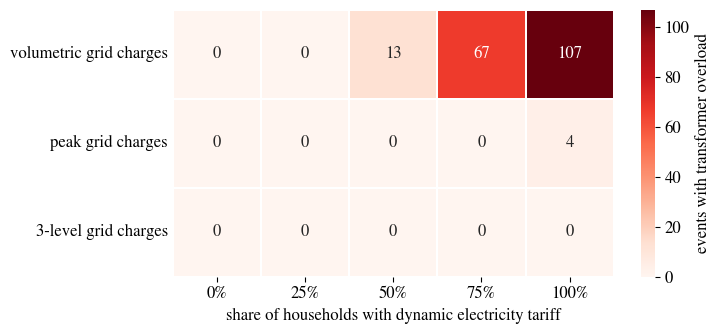

In [7]:
fig, ax = plt.subplots(figsize=(7.5, 3.5))

# Create heatmap using seaborn
sns.heatmap(trafoOverload, cmap='Reds', linewidths=0.3, annot=True, fmt='.0f', ax=ax)

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), ha="center", rotation_mode="anchor")

# Set y tick labels at the same position with vertical alignment 'center'
ax.set_yticklabels(trafoOverload.index, va='center')
    
# Hide y ticks
ax.tick_params(axis='y', which='both', length=0)

# Add color bar
cbar = ax.collections[0].colorbar
#set labels
ax.set_xlabel('share of households with dynamic electricity tariff')
cbar.set_label('events with transformer overload')
# Adjust layout
plt.tight_layout()

plt.savefig('TrafoOverload.png', bbox_inches='tight')
# Show plot
plt.show()

In [8]:
#Calculate critical trafo with load over 70%
tol_base_60 = (tl_base.iloc[:, 0] > 70).sum()
tol_peak0_60 = (tl_peak0.iloc[:, 0] > 70).sum()
tol_3Level0_60 = (tl_3Level0.iloc[:, 0] > 70).sum()

tol_flex25_60 = (tl_flex25.iloc[:, 0] > 70).sum()
tol_flex50_60 = (tl_flex50.iloc[:, 0] > 70).sum()
tol_flex75_60 = (tl_flex75.iloc[:, 0] > 70).sum()
tol_flex100_60 = (tl_flex100.iloc[:, 0] > 70).sum()

tol_peak25_60 = (tl_peak25.iloc[:, 0] > 70).sum()
tol_peak50_60 = (tl_peak50.iloc[:, 0] > 70).sum()
tol_peak75_60 = (tl_peak75.iloc[:, 0] > 70).sum()
tol_peak100_60 = (tl_peak100.iloc[:, 0] > 70).sum()

tol_3Level25_60 = (tl_3Level25.iloc[:, 0] > 70).sum()
tol_3Level50_60 = (tl_3Level50.iloc[:, 0] > 70).sum()
tol_3Level75_60 = (tl_3Level75.iloc[:, 0] > 70).sum()
tol_3Level100_60 = (tl_3Level100.iloc[:, 0] > 70).sum()

In [9]:
#Wirte results in a dataframe
trafoCritical = pd.DataFrame()
row_names =['volumetric grid charges', 'peak grid charges', '3-level grid charges']
trafoCritical['0%'] =[tol_base_60,tol_peak0_60,tol_3Level0_60]
trafoCritical['25%'] =[tol_flex25_60, tol_peak25_60, tol_3Level25_60]
trafoCritical['50%'] =[tol_flex50_60, tol_peak50_60, tol_3Level50_60]
trafoCritical['75%'] =[tol_flex75_60, tol_peak75_60, tol_3Level75_60]
trafoCritical['100%'] =[tol_flex100_60, tol_peak100_60, tol_3Level100_60]
trafoCritical.index = row_names

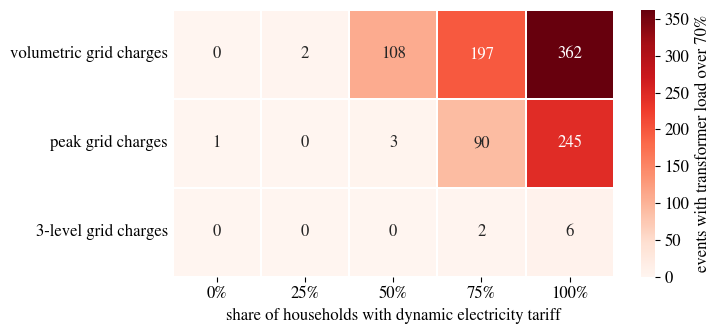

In [10]:
fig, ax = plt.subplots(figsize=(7.5, 3.5))

# Create heatmap using seaborn
sns.heatmap(trafoCritical, cmap='Reds', linewidths=0.3, annot=True, fmt='.0f', ax=ax)

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), ha="center", rotation_mode="anchor")

# Set y tick labels at the same position with vertical alignment 'center'
ax.set_yticklabels(trafoCritical.index, va='center')
    
# Hide y ticks
ax.tick_params(axis='y', which='both', length=0)

# Add color bar
cbar = ax.collections[0].colorbar

ax.set_xlabel('share of households with dynamic electricity tariff')

# Set labels
cbar.set_label('events with transformer load over 70%')

# Adjust layout
plt.tight_layout()

plt.savefig('CriticalTrafoLoad.png', bbox_inches='tight')
# Show plot
plt.show()

### Voltage Deviation

In [11]:
#Read in voltages in case of volumetric grid charges
vm_base =  pd.read_excel(r'.\results\results_0flex100flat\res_bus\vm_pu.xlsx', index_col=0)
vm_flex25 = pd.read_excel(r'.\results\results_25flex75flat\res_bus\vm_pu.xlsx', index_col=0)
vm_flex50 = pd.read_excel(r'.\results\results_50flex50flat\res_bus\vm_pu.xlsx', index_col=0)
vm_flex75 = pd.read_excel(r'.\results\results_75flex25flat\res_bus\vm_pu.xlsx', index_col=0)
vm_flex100 = pd.read_excel(r'.\results\results_100flex0flat\res_bus\vm_pu.xlsx', index_col=0)

#determine the number of over- and under-voltage events and the minimal voltage
vmd_base = sum(vm_base.min(axis=1) >= 1.1) + sum(vm_base.min(axis=1) <= 0.9)
vmd_min_base = min(vm_base.min(axis=1))
vmd_flex25 = sum(vm_flex25.min(axis=1) >= 1.1) + sum(vm_flex25.min(axis=1) <= 0.9)
vmd_min_flex25 = min(vm_flex25.min(axis=1))
vmd_flex50 = sum(vm_flex50.min(axis=1) >= 1.1) + sum(vm_flex50.min(axis=1) <= 0.9)
vmd_min_flex50 = min(vm_flex50.min(axis=1))
vmd_flex75 = sum(vm_flex75.min(axis=1) >= 1.1) + sum(vm_flex75.min(axis=1) <= 0.9)
vmd_min_flex75 = min(vm_flex75.min(axis=1))
vmd_flex100 = sum(vm_flex100.min(axis=1) >= 1.1) + sum(vm_flex100.min(axis=1) <= 0.9)
vmd_min_flex100 = min(vm_flex100.min(axis=1))

In [12]:
#Read in voltages in case of volumetric grid charges and additional peak price grid charges
vm_peak0 = pd.read_excel(r'.\results\results_0flex100flat_peak\res_bus\vm_pu.xlsx', index_col=0)
vm_peak25 = pd.read_excel(r'.\results\results_25flex75flat_peak\res_bus\vm_pu.xlsx', index_col=0)
vm_peak50 = pd.read_excel(r'.\results\results_50flex50flat_peak\res_bus\vm_pu.xlsx', index_col=0)
vm_peak75 = pd.read_excel(r'.\results\results_75flex25flat_peak\res_bus\vm_pu.xlsx', index_col=0)
vm_peak100 = pd.read_excel(r'.\results\results_100flex0flat_peak\res_bus\vm_pu.xlsx', index_col=0)

#determine the number of over- and under-voltage events and the minimal voltage
vmd_peak0 = sum(vm_peak0.min(axis=1) >= 1.1) + sum(vm_peak0.min(axis=1) <= 0.9)
vmd_min_peak0 = min(vm_peak0.min(axis=1))
vmd_peak25 = sum(vm_peak25.min(axis=1) >= 1.1) + sum(vm_peak25.min(axis=1) <= 0.9)
vmd_min_peak25 = min(vm_peak25.min(axis=1))
vmd_peak50 = sum(vm_peak50.min(axis=1) >= 1.1) + sum(vm_peak50.min(axis=1) <= 0.9)
vmd_min_peak50 = min(vm_peak50.min(axis=1))
vmd_peak75 = sum(vm_peak75.min(axis=1) >= 1.1) + sum(vm_peak75.min(axis=1) <= 0.9)
vmd_min_peak75 = min(vm_peak75.min(axis=1))
vmd_peak100 = sum(vm_peak100.min(axis=1) >= 1.1) + sum(vm_peak100.min(axis=1) <= 0.9)
vmd_min_peak100 = min(vm_peak100.min(axis=1))

In [13]:
#Read in voltages in case of three-level segmented grid charges
vm_3Level0 = pd.read_excel(r'.\results\results_0flex100flat_3Level\res_bus\vm_pu.xlsx', index_col=0)
vm_3Level25 = pd.read_excel(r'.\results\results_25flex75flat_3Level\res_bus\vm_pu.xlsx', index_col=0)
vm_3Level50 = pd.read_excel(r'.\results\results_50flex50flat_3Level\res_bus\vm_pu.xlsx', index_col=0)
vm_3Level75 = pd.read_excel(r'.\results\results_75flex25flat_3Level\res_bus\vm_pu.xlsx', index_col=0)
vm_3Level100 = pd.read_excel(r'.\results\results_100flex0flat_3Level\res_bus\vm_pu.xlsx', index_col=0)

vmd_3Level0 = sum(vm_3Level0.min(axis=1) >= 1.1) + sum(vm_3Level0.min(axis=1) <= 0.9)
vmd_min_3Level0 = min(vm_3Level0.min(axis=1))
vmd_3Level25 = sum(vm_3Level25.min(axis=1) >= 1.1) + sum(vm_3Level25.min(axis=1) <= 0.9)
vmd_min_3Level25 = min(vm_3Level25.min(axis=1))
vmd_3Level50 = sum(vm_3Level50.min(axis=1) >= 1.1) + sum(vm_3Level50.min(axis=1) <= 0.9)
vmd_min_3Level50 = min(vm_3Level50.min(axis=1))
vmd_3Level75 = sum(vm_3Level75.min(axis=1) >= 1.1) + sum(vm_3Level75.min(axis=1) <= 0.9)
vmd_min_3Level75 = min(vm_3Level75.min(axis=1))
vmd_3Level100 = sum(vm_3Level100.min(axis=1) >= 1.1) + sum(vm_3Level100.min(axis=1) <= 0.9)
vmd_min_3Level100 = min(vm_3Level100.min(axis=1))

In [14]:
#Wirte results of number of under-voltage events in a dataframe
Undervoltage = pd.DataFrame()
row_names =['volumetric grid charges', 'peak grid charges', '3-level grid charges']
Undervoltage['0%'] =[vmd_base,vmd_peak0,vmd_3Level0]
Undervoltage['25%'] =[vmd_flex25, vmd_peak25, vmd_3Level25]
Undervoltage['50%'] =[vmd_flex50, vmd_peak50, vmd_3Level50]
Undervoltage['75%'] =[vmd_flex75, vmd_peak75, vmd_3Level75]
Undervoltage['100%'] =[vmd_flex100, vmd_peak100, vmd_3Level100]
Undervoltage.index = row_names

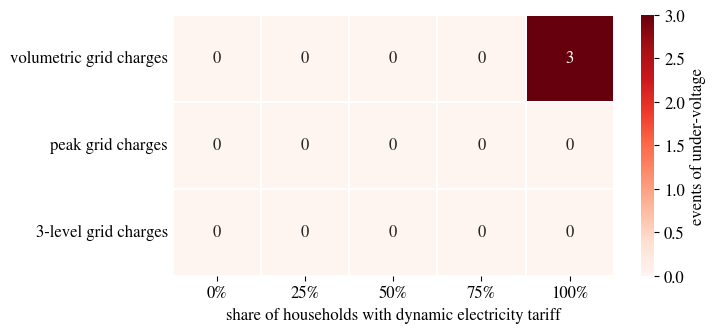

In [15]:
#Plot heatmap
fig, ax = plt.subplots(figsize=(7.5, 3.5))
# Create heatmap using seaborn
sns.heatmap(Undervoltage, cmap='Reds', linewidths=0.3, annot=True, fmt='.0f', ax=ax)
# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), ha="center", rotation_mode="anchor")
# Set y tick labels at the same position with vertical alignment 'center'
ax.set_yticklabels(Undervoltage.index, va='center')  
# Hide y ticks
ax.tick_params(axis='y', which='both', length=0)
# Add color bar
cbar = ax.collections[0].colorbar
# Set labels
ax.set_xlabel('share of households with dynamic electricity tariff')
cbar.set_label('events of under-voltage')

# Adjust layout
plt.tight_layout()

plt.savefig('Undervoltage.png', bbox_inches='tight')
# Show plot
plt.show()

In [16]:
#Wirte the minimum voltage per scenario in a dataframe
Minvoltage = pd.DataFrame()
row_names =['volumetric grid charges', 'peak grid charges', '3-level grid charges']
Minvoltage['0%'] =[vmd_min_base,vmd_min_peak0,vmd_min_3Level0]
Minvoltage['25%'] =[vmd_min_flex25, vmd_min_peak25, vmd_min_3Level25]
Minvoltage['50%'] =[vmd_min_flex50, vmd_min_peak50, vmd_min_3Level50]
Minvoltage['75%'] =[vmd_min_flex75, vmd_min_peak75, vmd_min_3Level75]
Minvoltage['100%'] =[vmd_min_flex100, vmd_min_peak100, vmd_min_3Level100]
Minvoltage.index = row_names

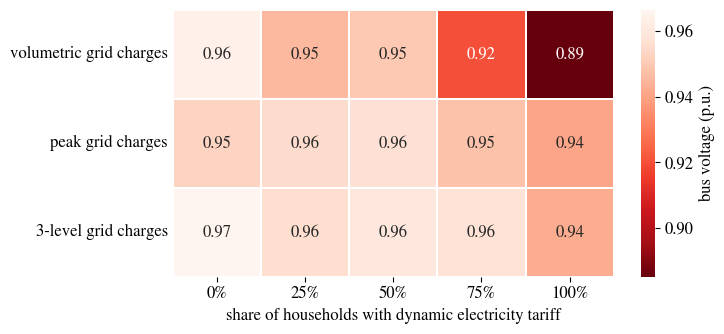

In [17]:
#Plot heatmap
fig, ax = plt.subplots(figsize=(7.5, 3.5))
# Create heatmap using seaborn
sns.heatmap(Minvoltage, cmap='Reds_r', linewidths=0.3, annot=True, ax=ax)
# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), ha="center", rotation_mode="anchor")
# Set y tick labels at the same position with vertical alignment 'center'
ax.set_yticklabels(Minvoltage.index, va='center')  
# Hide y ticks
ax.tick_params(axis='y', which='both', length=0)
# Add color bar
cbar = ax.collections[0].colorbar
# Set labels
ax.set_xlabel('share of households with dynamic electricity tariff')
cbar.set_label('bus voltage (p.u.)')

# Adjust layout
plt.tight_layout()

plt.savefig('MinVoltage.png', bbox_inches='tight')
# Show plot
plt.show()

### Line Loading

In [18]:
#Read in line loading in case of volumetric grid charges
ll_base =  pd.read_excel(r'.\results\results_0flex100flat\res_line\loading_percent.xlsx', index_col=0)
ll_flex25 = pd.read_excel(r'.\results\results_25flex75flat\res_line\loading_percent.xlsx', index_col=0)
ll_flex50 = pd.read_excel(r'.\results\results_50flex50flat\res_line\loading_percent.xlsx', index_col=0)
ll_flex75 = pd.read_excel(r'.\results\results_75flex25flat\res_line\loading_percent.xlsx', index_col=0)
ll_flex100 = pd.read_excel(r'.\results\results_100flex0flat\res_line\loading_percent.xlsx', index_col=0)

#Calculate the number of line overloading events and the time steps with line overloading
ll_base_ts_overload = sum(ll_base.max(axis=1)>100)
ll_base_number_overload = (ll_base > 100).sum().sum()
ll_flex25_ts_overload = sum(ll_flex25.max(axis=1)>100)
ll_flex25_number_overload = (ll_flex25 > 100).sum().sum()
ll_flex50_ts_overload = sum(ll_flex50.max(axis=1)>100)
ll_flex50_number_overload = (ll_flex50 > 100).sum().sum()
ll_flex75_ts_overload = sum(ll_flex75.max(axis=1)>100)
ll_flex75_number_overload = (ll_flex75 > 100).sum().sum()
ll_flex100_ts_overload = sum(ll_flex100.max(axis=1)>100)
ll_flex100_number_overload = (ll_flex100 > 100).sum().sum()

#Determine the maximum line loading in each scenario
ll_flex0_max = ll_base.max().max()
ll_flex25_max = ll_flex25.max().max()
ll_flex50_max = ll_flex50.max().max()
ll_flex75_max = ll_flex75.max().max()
ll_flex100_max = ll_flex100.max().max()

In [19]:
#Read in line loading in case of volumetric grid charges with additional peak price grid charges
ll_peak0 = pd.read_excel(r'.\results\results_0flex100flat_peak\res_line\loading_percent.xlsx', index_col=0)
ll_peak25 = pd.read_excel(r'.\results\results_25flex75flat_peak\res_line\loading_percent.xlsx', index_col=0)
ll_peak50 = pd.read_excel(r'.\results\results_50flex50flat_peak\res_line\loading_percent.xlsx', index_col=0)
ll_peak75 = pd.read_excel(r'.\results\results_75flex25flat_peak\res_line\loading_percent.xlsx', index_col=0)
ll_peak100 = pd.read_excel(r'.\results\results_100flex0flat_peak\res_line\loading_percent.xlsx', index_col=0)

#Calculate the number of line overloading events and the time steps with line overloading
ll_peak0_ts_overload = sum(ll_peak0.max(axis=1)>100)
ll_peak0_number_overload = (ll_peak0 > 100).sum().sum()
ll_peak25_ts_overload = sum(ll_peak25.max(axis=1)>100)
ll_peak25_number_overload = (ll_peak25 > 100).sum().sum()
ll_peak50_ts_overload = sum(ll_peak50.max(axis=1)>100)
ll_peak50_number_overload = (ll_peak50 > 100).sum().sum()
ll_peak75_ts_overload = sum(ll_peak75.max(axis=1)>100)
ll_peak75_number_overload = (ll_peak75 > 100).sum().sum()
ll_peak100_ts_overload = sum(ll_peak100.max(axis=1)>100)
ll_peak100_number_overload = (ll_peak100 > 100).sum().sum()

#Determine the maximum line loading in each scenario
ll_peak0_max = ll_peak0.max().max()
ll_peak25_max = ll_peak25.max().max()
ll_peak50_max = ll_peak50.max().max()
ll_peak75_max = ll_peak75.max().max()
ll_peak100_max = ll_peak100.max().max()

In [20]:
#Read in line loading in case of three-level segmented grid charges
ll_3Level0 = pd.read_excel(r'.\results\results_0flex100flat_3Level\res_line\loading_percent.xlsx', index_col=0)
ll_3Level25 = pd.read_excel(r'.\results\results_25flex75flat_3Level\res_line\loading_percent.xlsx', index_col=0)
ll_3Level50 = pd.read_excel(r'.\results\results_50flex50flat_3Level\res_line\loading_percent.xlsx', index_col=0)
ll_3Level75 = pd.read_excel(r'.\results\results_75flex25flat_3Level\res_line\loading_percent.xlsx', index_col=0)
ll_3Level100 = pd.read_excel(r'.\results\results_100flex0flat_3Level\res_line\loading_percent.xlsx', index_col=0)

#Calculate the number of line overloading events and the time steps with line overloading
ll_3Level0_ts_overload = sum(ll_3Level0.max(axis=1)>100)
ll_3Level0_number_overload = (ll_3Level0 > 100).sum().sum()
ll_3Level25_ts_overload = sum(ll_3Level25.max(axis=1)>100)
ll_3Level25_number_overload = (ll_3Level25 > 100).sum().sum()
ll_3Level50_ts_overload = sum(ll_3Level50.max(axis=1)>100)
ll_3Level50_number_overload = (ll_3Level50 > 100).sum().sum()
ll_3Level75_ts_overload = sum(ll_3Level75.max(axis=1)>100)
ll_3Level75_number_overload = (ll_3Level75 > 100).sum().sum()
ll_3Level100_ts_overload = sum(ll_3Level100.max(axis=1)>100)
ll_3Level100_number_overload = (ll_3Level100 > 100).sum().sum()

#Determine the maximum line loading in each scenario
ll_3Level0_max = ll_3Level0.max().max()
ll_3Level25_max = ll_3Level25.max().max()
ll_3Level50_max = ll_3Level50.max().max()
ll_3Level75_max = ll_3Level75.max().max()
ll_3Level100_max = ll_3Level100.max().max()

In [21]:
#Wirte the number of line overloading per scenario in a dataframe
ll_ts_overload = pd.DataFrame()
row_names =['volumetric grid charges', 'peak grid charges', '3-level grid charges']
ll_ts_overload['0%'] = [ll_base_ts_overload ,ll_peak0_ts_overload,ll_3Level0_ts_overload]
ll_ts_overload['25%'] = [ll_flex25_ts_overload ,ll_peak25_ts_overload,ll_3Level25_ts_overload]
ll_ts_overload['50%'] = [ll_flex50_ts_overload ,ll_peak50_ts_overload,ll_3Level50_ts_overload]
ll_ts_overload['75%'] = [ll_flex75_ts_overload ,ll_peak75_ts_overload,ll_3Level75_ts_overload]
ll_ts_overload['100%'] = [ll_flex100_ts_overload ,ll_peak100_ts_overload,ll_3Level100_ts_overload]
ll_ts_overload.index = row_names

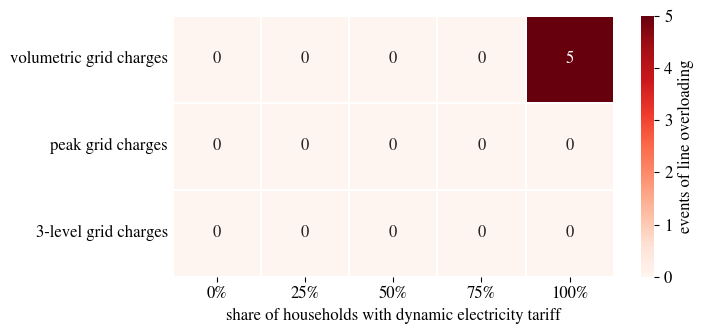

In [22]:
#Plot heatmap
fig, ax = plt.subplots(figsize=(7.5, 3.5))
# Create heatmap using seaborn
sns.heatmap(ll_ts_overload, cmap='Reds', linewidths=0.3, annot=True,fmt=".0f", ax=ax)
# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), ha="center", rotation_mode="anchor")
# Set y tick labels at the same position with vertical alignment 'center'
ax.set_yticklabels(ll_ts_overload.index, va='center')   
# Hide y ticks
ax.tick_params(axis='y', which='both', length=0)
# Add color bar
cbar = ax.collections[0].colorbar
# Set labels
ax.set_xlabel('share of households with dynamic electricity tariff')
cbar.set_label('events of line overloading')

# Adjust layout
plt.tight_layout()

plt.savefig('LineOverloading.png', bbox_inches='tight')
# Show plot
plt.show()

In [23]:
#Wirte the maximum line loading per scenario in a dataframe
max_ll = pd.DataFrame()
row_names =['volumetric grid charges', 'peak grid charges', '3-level grid charges']
max_ll['0%'] = [ll_flex0_max, ll_peak0_max, ll_3Level0_max]
max_ll['25%'] = [ll_flex25_max, ll_peak25_max, ll_3Level25_max]
max_ll['50%'] = [ll_flex50_max, ll_peak50_max, ll_3Level50_max]
max_ll['75%'] = [ll_flex75_max, ll_peak75_max, ll_3Level75_max]
max_ll['100%'] = [ll_flex100_max, ll_peak100_max, ll_3Level100_max]
max_ll.index = row_names

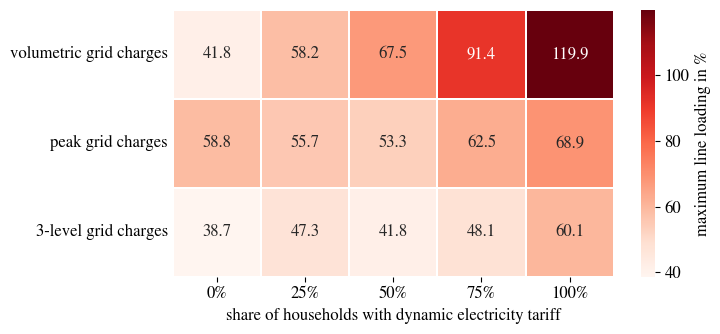

In [24]:
#Plot heatmap
fig, ax = plt.subplots(figsize=(7.5, 3.5))
# Create heatmap using seaborn
sns.heatmap(max_ll, cmap='Reds', linewidths=0.3, annot=True,fmt=".1f", ax=ax)
# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), ha="center", rotation_mode="anchor")
# Set y tick labels at the same position with vertical alignment 'center'
ax.set_yticklabels(Undervoltage.index, va='center')    
# Hide y ticks
ax.tick_params(axis='y', which='both', length=0)
# Add color bar
cbar = ax.collections[0].colorbar
# Set labels
ax.set_xlabel('share of households with dynamic electricity tariff')
cbar.set_label('maximum line loading in %')

# Adjust layout
plt.tight_layout()

plt.savefig('MaxLineLoading.png', bbox_inches='tight')
# Show plot
plt.show()

### Household costs

Load the data

In [27]:
cost_vol_flat = pd.read_csv("cost_before_shift.csv", index_col=0)
cost_vol_dyn = pd.read_csv("cost_after_shift.csv", index_col=0)
cost_peak_flat = pd.read_csv("cost_after_shift_peak_flat.csv", index_col=0)
cost_peak_dyn = pd.read_csv("cost_after_shift_peak_dyn.csv", index_col=0)
cost_3l_flat = pd.read_csv("cost_after_shift_3Level_flat.csv", index_col=0)
cost_3l_dyn = pd.read_csv("cost_after_shift_3Level_dyn.csv", index_col=0)

In [28]:
#Calculate the difference between the costs when using flat vs. dynamic energy prices for each grid tariff
diff_volumetric = []
diff_peak = []
diff_3Level= []
for i in range(22):
    diff_volumetric.append(cost_vol_flat.iloc[i,0]-cost_vol_dyn.iloc[i,0])
    diff_peak.append(cost_peak_flat.iloc[i,0]- cost_peak_dyn.iloc[i,0])
    diff_3Level.append(cost_3l_flat.iloc[i,0] - cost_3l_dyn.iloc[i,0])

In [30]:
#Create dataframe to compare household costs in case of volumetric grid charges
volumetric = pd.DataFrame()
volumetric["fix energy prices"] = cost_vol_flat
volumetric["dynamic energy prices"] = cost_vol_dyn 
volumetric["cost savings"]= diff_volumetric
volumetric = volumetric.round(2)
volumetric

,fix energy prices,dynamic energy prices,cost savings
0,2880.45,2809.11,71.35
1,8117.02,7914.71,202.31
2,5981.20,5831.59,149.61
3,3143.95,3093.87,50.08
4,4375.50,4333.19,42.30
5,3131.96,3086.77,45.19
6,5120.76,5059.06,61.70
7,2173.47,2168.10,5.37
8,2747.60,2695.83,51.77
9,2742.36,2702.50,39.85


In [32]:
#Create dataframe to compare household costs in case of volumetric grid charges and additional peak price grid charges
peak = pd.DataFrame()
peak["fix energy prices"] = cost_peak_flat
peak["dynamic energy prices"] = cost_peak_dyn
peak["cost savings"] = diff_peak
peak.index = np.arange(1, 23)
peak = peak.round(2)
peak

,fix energy prices,dynamic energy prices,cost savings
1,2817.60,2750.82,66.78
2,7228.60,7059.32,169.28
3,5597.18,5456.15,141.02
4,2895.37,2847.20,48.18
5,4093.72,4053.11,40.61
6,3207.85,3164.32,43.52
7,4726.56,4669.86,56.70
8,2071.19,2068.11,3.08
9,3033.41,2983.10,50.31
10,2917.45,2877.99,39.46


In [33]:
#Create dataframe to compare household costs in case of three-level segmented grid charges
level3 = pd.DataFrame()
level3["fix energy prices"] = cost_3l_flat
level3["dynamic energy prices"] = cost_3l_dyn
level3["cost savings"] = diff_3Level
level3.index = np.arange(1, 23)
level3 = level3.round(2)
level3

,fix energy prices,dynamic energy prices,cost savings
1,2216.36,2180.76,35.60
2,8691.05,8617.03,74.01
3,5697.07,5625.17,71.91
4,2295.03,2267.56,27.47
5,3718.24,3695.47,22.77
6,3144.95,3120.36,24.59
7,4864.74,4848.99,15.75
8,1626.35,1629.83,-3.48
9,2588.55,2559.44,29.10
10,2320.54,2295.58,24.96


In [34]:
#Deterine the revenue of the DSO in each scenario (revenue is the sum of all household costs)
revenue = pd.DataFrame()
revenue["Volumetric Grid Charges"]=[cost_vol_flat.sum().sum(),cost_vol_dyn.sum().sum()]
revenue["Peak Price Grid Charges"]=[cost_peak_flat.sum().sum(),cost_peak_dyn.sum().sum()]
revenue["3-Level Grid Charges"]=[cost_3l_flat.sum().sum(),cost_3l_dyn.sum().sum()]
revenue.round(2)

,Volumetric Grid Charges,Peak Price Grid Charges,3-Level Grid Charges
0,81487.23,77999.97,73228.30
1,80414.23,77008.90,72806.98
